# Hyperbolic Trajectories ($e > 1$)

For the hyperbola, combining Eq. {eq}`eq:time-since-periapsis` and Eq. {eq}`eq:time-since-periapsis-rhs-e-gt-1` results in:

:::{math}
:label: eq:mean-anomaly-hyperbola
M_h = \frac{e\sqrt{e^2 - 1}\sin\nu}{1 + e\cos\nu} - \ln\left[\frac{\sqrt{e + 1} + \sqrt{e - 1}\tan\frac{\nu}{2}}{\sqrt{e + 1} - \sqrt{e - 1}\tan\frac{\nu}{2}}\right]
:::

where

:::{math}
:label: eq:hyperbolic-mean-anomaly
M_h = \frac{\mu^2}{h^3} t \left(e^2 - 1\right)^{3/2}
:::

The hyperbolic mean anomaly, like the elliptical mean anomaly, is a monotonic function of the true anomaly, as shown in {numref}`fig:mean-anomaly-hyperbola-function`.

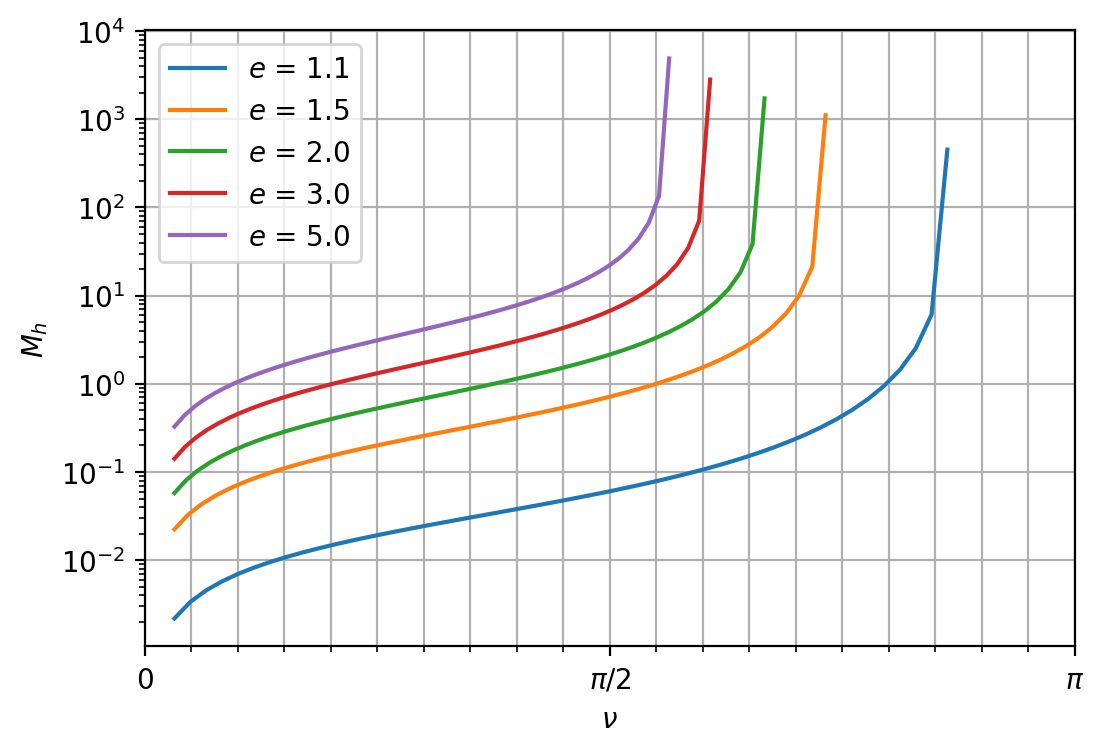

In [1]:
from functools import partial
from myst_nb import glue as myst_glue

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FuncFormatter,
                               AutoMinorLocator)
import numpy as np

glue = partial(myst_glue, display=False)

fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
ax.set_ylabel("$M_h$")
ax.set_xlabel(r"$\nu$")
ax.set_xlim(0, np.pi)
e_vals = [1.1, 1.5, 2.0, 3.0, 5.0]
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi / 2))
ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi/2: r"$\pi$/2", np.pi: r"$\pi$"}.get(val, "")))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax.xaxis.grid(which="both")
ax.yaxis.grid(which="major")
for e in e_vals:
    nu_inf = np.arccos(-1 / e)
    nu = np.linspace(0.1, nu_inf - 1.0E-3)
    M_h = e * np.sqrt(e**2 - 1) * np.sin(nu) / (1 + e * np.cos(nu))
    sqrt_e_p_1 = np.sqrt(e + 1)
    sqrt_e_m_1_t = np.sqrt(e - 1) * np.tan(nu / 2)
    M_h -= np.log((sqrt_e_p_1 + sqrt_e_m_1_t) / (sqrt_e_p_1 - sqrt_e_m_1_t))
    ax.semilogy(nu, M_h, label=f"$e$ = {e}")
ax.legend()
glue("mean-anomaly-hyperbola-function", fig)

:::{glue:figure} mean-anomaly-hyperbola-function
:name: fig:mean-anomaly-hyperbola-function

The hyperbolic mean anomaly as a function of true anomaly. Note that the $y$-scale is a log scale.
:::

Notice that $\nu$ cannot exceed $\nu_{\infty} = \cos^{-1}(-1 / e)$.

## Hyperbolic Eccentric Anomaly

Similar to the ellipse, we will define an auxiliary angle $F$ to simplify the equations. $F$ is defined with reference to the hyperbola in {numref}`fig:hyperbolic-eccentric-anomaly-figure`.

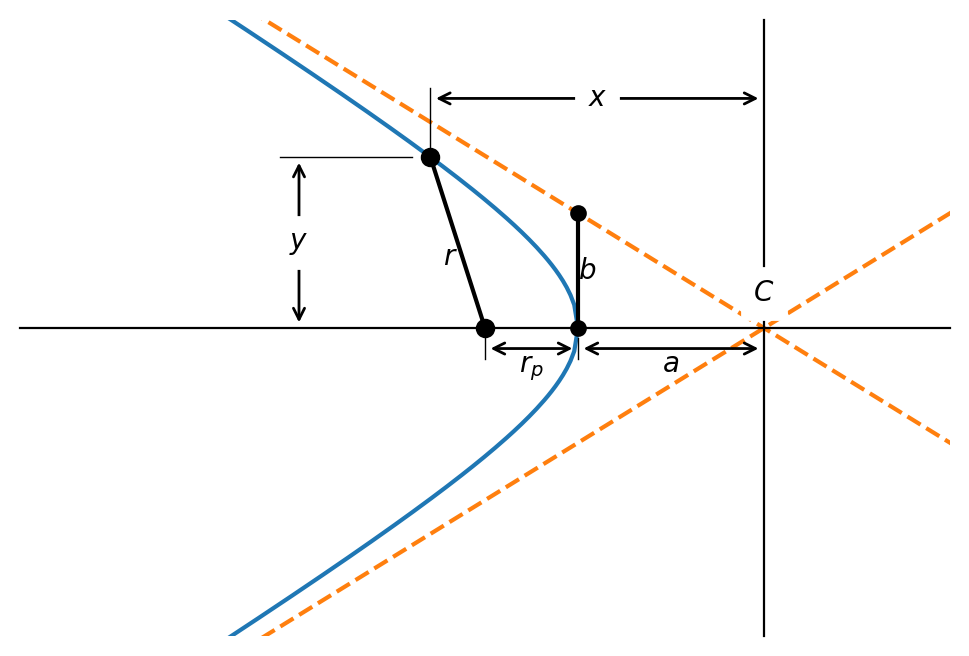

In [2]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
ax.set_aspect("auto")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_tick_params(bottom=False, top=False, which="both", labelbottom=False)
ax.yaxis.set_tick_params(left=False, right=False, which="both", labelleft=False)

# Move remaining spines to the center
ax.spines["bottom"].set_position("zero")  # spine for xaxis
ax.spines["left"].set_position("zero")  # spine for yaxis

e = 1.5
nu_inf = np.arccos(-1 / e)
a = 1
b = a * np.sqrt(e ** 2 - 1)
r_p = a * (e - 1)
x_a = 100 * np.cos(nu_inf)
y_a = 100 * np.sin(nu_inf)

ax.set_xlim(-4, 1)
ax.set_ylim(-3, 3)

x = np.linspace(a, 3 * a, 100)
y = b / a * np.sqrt(x ** 2 - a ** 2)
ax.plot(np.hstack((-x[::-1], -x)), np.hstack((y[::-1], -y)))
ax.plot((x_a, -x_a), (y_a, -y_a), ls="--", color="C1")
ax.plot((-x_a, x_a), (y_a, -y_a), ls="--", color="C1")

t = np.radians(100)
r = a * (e ** 2 - 1) / (1 + e * np.cos(t))
x_1 = -a - r_p + r * np.cos(t)
y_1 = r * np.sin(t)
hyperbola_focus = -a - r_p
ax.plot((hyperbola_focus, x_1), (0, y_1), "k-o")
ax.plot((-a, -a), (0, b), "ko-", markersize=5)
ax.annotate("", xy=(-2*a - r_p, 0), xytext=(-2*a - r_p, y_1), arrowprops={"arrowstyle": "<->"})
ax.annotate("$y$", xy=(-2*a - r_p, y_1/2), backgroundcolor="white", ha="center", va="center")
ax.plot((-2*a - r_p - 0.1, x_1 - 0.1), (y_1, y_1), color="black", lw=0.5)
ax.annotate("", xy=(0, 2*b), xytext=(x_1, 2*b), arrowprops={"arrowstyle": "<->"})
ax.annotate("$x$", xy=(x_1/2, 2*b), backgroundcolor="white", ha="center", va="center")
ax.plot((x_1, x_1), (2*b + 0.1, y_1 + 0.1), color="black", lw=0.5)
ax.annotate("$b$", xy=(-a, b/2), ha="left", va="center")
ax.annotate("", xy=(0, -0.2), xytext=(-a, -0.2), arrowprops={"arrowstyle": "<->"})
ax.annotate("$a$", xy=(-a/2, -0.35), ha="center", va="center")
ax.annotate("", xy=(-a, -0.2), xytext=(-a - r_p, -0.2), arrowprops={"arrowstyle": "<->"})
ax.annotate("$r_p$", xy=(-a - r_p/2, -0.4), ha="center", va="center")
ax.plot((-a - r_p, -a - r_p), (-0.1, -0.3), lw=0.5, color="black")
ax.plot((-a , -a), (-0.1, -0.3), lw=0.5, color="black")
ax.annotate("$r$", xy=((x_1 + hyperbola_focus) / 2, y_1 / 2), ha="right", va="top")
ax.annotate("$C$", xy=(0, 0.2), va="bottom", ha="center", backgroundcolor="white")
glue("hyperbolic-eccentric-anomaly-figure", fig)

:::{glue:figure} hyperbolic-eccentric-anomaly-figure
:name: fig:hyperbolic-eccentric-anomaly-figure

A hyperbolic trajectory with definitions for distances used in the derivation of Kepler's law for hyperbolic.
:::

The ratio $y/b$ is the definition of the hyperbolic sine of the angle $F$:

:::{math}
:label:
\sinh F = \frac{y}{b}
:::

Then, using the hyperbolic trigonometric identity:

:::{math}
:label:
\cosh^2 c - \sinh^2 c = 1
:::

we also define

:::{math}
:label:
\cosh F = \frac{x}{a}
:::

::::{note}
The hyperbolic angle $F$ is weird. The reason we don't draw it on the figure is because hyperbolic angles aren't angles _per se_. Instead, they can be interpreted as half the area between the $x$-axis and a line drawn from the origin to the point of interest, bounded by the hyperbola. I think. At least, that's my best interpretation from what I've been able to read. YMMV.

Another way of thinking about this is by analogy to a circle. For a circle, we can draw any two lines from the center of the circle to the perimeter. These two lines will have an angle $\phi$ between them, and the area between them will be:

:::{math}
:label:
A_{\text{circular sector}} = \frac{r^2 \phi}{2}
:::

:::{figure} ../images/Circle_arc.svg
:name: fig:circle_arc

The highlighted area is a **circular sector**. Modified from [Wikimedia](https://en.wikipedia.org/wiki/File:Circle_arc.svg).
:::

If the circle is a unit circle ($r = 1$), then the area of the sector will be equal to the angle divided by two. Turned around, the angle is equal to twice the area:

:::{math}
:label:
\phi = \frac{2A}{1^2}
:::

Similarly, the hyperbolic angle is defined on the unit hyperbola as twice the area between two lines that start at the origin and touch the hyperbola, called a **hyperbolic sector**.

:::{figure} ../images/Hyperbolic_functions-2.svg
:name: fig:hyperbolic_functions

The area of the hyperbolic sector is half the hyperbolic angle. [Hyperbolic_functions.svg: The original uploader was Marco Polo at English Wikipedia.derivative work: Jeandavid54](https://commons.wikimedia.org/wiki/File:Hyperbolic_functions-2.svg), Public domain, via Wikimedia Commons
:::

However, the circular angle between the $x$-axis and the ray from the origin is not the same as the hyperbolic angle.

You can read more about hyperbolic angles on [Brilliant](https://brilliant.org/wiki/hyperbolic-trigonometric-functions/) and on [Wikipedia](https://en.wikipedia.org/wiki/Hyperbolic_angle).
::::

We can relate $F$ to the true anomaly $\nu$ by plugging in $y = r\sin\nu$, and the orbit equation for $r$. We also note that $b = a\sqrt{e^2 - 1}$. Then:

:::{math}
:label:
F = \sinh^{-1}\left(\frac{\sin\nu\sqrt{e^2 - 1}}{1 + e\cos\nu}\right) = \ln\left(\frac{\sin\nu\sqrt{e^2 - 1} + \cos\nu + e}{1 + e\cos\nu}\right)
:::

After some more trigonometry and algebra, we find:

:::{math}
:label:
F= \ln\left[\frac{\sqrt{e + 1} + \sqrt{e - 1}\tan\frac{\nu}{2}}{\sqrt{e + 1} - \sqrt{e - 1}\tan\frac{\nu}{2}}\right]
:::

And, with a little more algebra and trigonometry, we find an equation for $F$ in terms of $\nu$ more directly, analogous to the ellipse:

:::{math}
:label: eq:eccentric-anomaly-true-anomaly-hyperbola
\tanh\frac{F}{2} = \sqrt{\frac{e - 1}{e + 1}}\tan\frac{\nu}{2}
:::

## Kepler's Equation for the Hyperbola

Substituting this back into Eq. {eq}`eq:mean-anomaly-hyperbola`, we find **Kepler's equation for the hyperbola**:

:::{math}
:label: eq:hyperbolic-keplers-equation
M_h = e\sinh F - F
:::

As with the ellipse, Kepler's equation can be solved easily if $F$ is known. However, if time is the known quantity, then Kepler's equation is transcendental and must be solved numerically. The form of the equation for the Newton solver is $f(F) = 0$, or:

:::{math}
:label:
f(F) = 0 = e\sinh F - F - M_h
:::

To aid in the numerical solution, the derivative of Kepler's equation for the hyperbola is:

:::{math}
:label:
f'(F) = e \cosh F - 1
:::

In addition, we can estimate an initial value for the guess of $F$ from {numref}`fig:hyperbolic-mean-anomaly-vs-eccentric-anomaly`, with a known $M_h$ value.

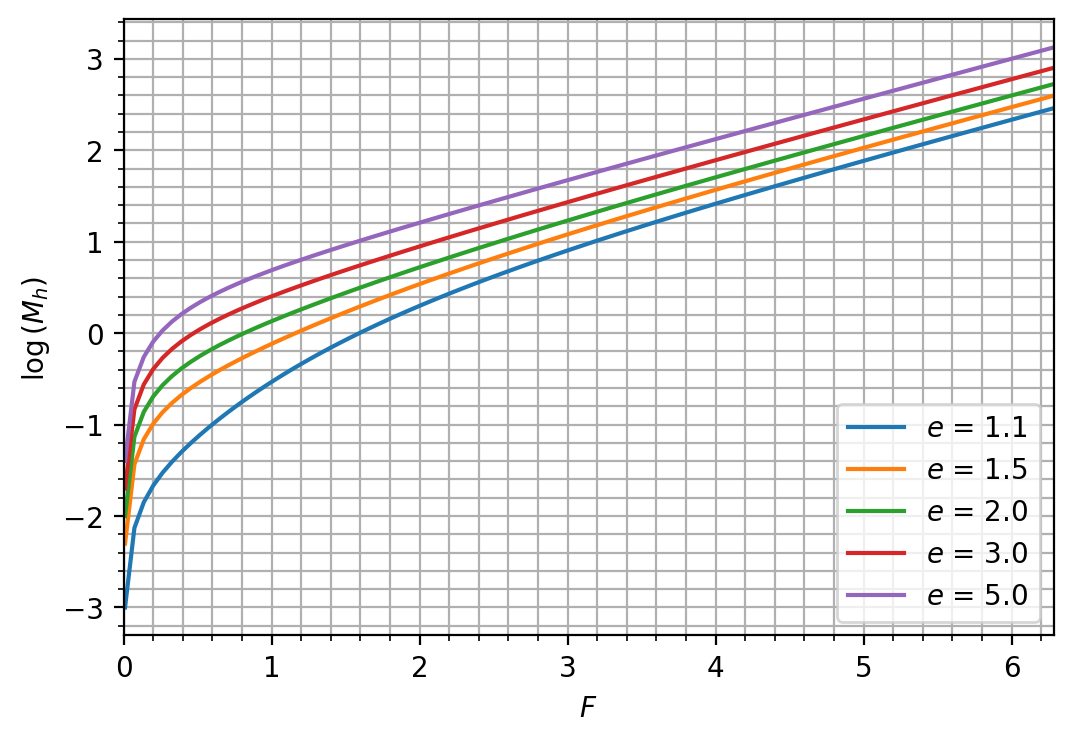

In [3]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

ax.set_ylabel(r"$\log\left(M_h\right)$")
ax.set_xlabel("$F$")
ax.set_xlim(0, 2 * np.pi)
e_vals = [1.1, 1.5, 2.0, 3.0, 5.0]
F = np.linspace(0.01, 2 * np.pi, 100)
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.grid(which="both")
for e in e_vals:
    M_h = np.log10(e * np.sinh(F) - F)
    ax.plot(F, M_h, label=f"$e$ = {e}")
ax.legend()
glue("hyperbolic-mean-anomaly-vs-eccentric-anomaly", fig)

:::{glue:figure} hyperbolic-mean-anomaly-vs-eccentric-anomaly
:name: fig:hyperbolic-mean-anomaly-vs-eccentric-anomaly

The hyperbolic mean anomaly as a function of the eccentric anomaly
:::

 Note that the $y$-axis plots the log base 10 of $M_h$. To use the graph, take the log base 10 of whatever value you calculate for $M_h$ and find that on the graph. For example, assume that $M_h =$ 40.69 rad and $e =$ 2.5. Then,

 :::{math}
 \log_{10}(40.69) = 1.6
 :::

From {numref}`fig:hyperbolic-mean-anomaly-vs-eccentric-anomaly`, we estimate that $F =$ 4, and we can use this as the initial guess for a Newton solver.